<a href="https://colab.research.google.com/github/Naman-Jain05/wattscale-fyp/blob/main/wattscale_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import time

# time taken to read data
s_time_chunk = time.time()
chunk = pd.read_csv('/content/drive/MyDrive/15minute_data_austin.csv', chunksize=1000000,on_bad_lines='skip')
e_time_chunk = time.time()

print("With chunks: ", (e_time_chunk-s_time_chunk), "sec")
ndf = pd.concat(chunk)

# mean_value = ndf['grid'].mean()
# ndf['grid'].fillna(value=mean_value, inplace=True)

With chunks:  0.031603336334228516 sec


In [ ]:
ndf

,dataid,local_15min,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,661,2018-11-21 15:15:00-06,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.915,124.277
1,661,2018-11-21 15:30:00-06,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.959,124.293
2,661,2018-11-21 15:45:00-06,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.886,124.240
3,661,2018-11-21 16:00:00-06,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.880,124.175
4,661,2018-11-21 16:15:00-06,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.633,124.226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873281,9278,2018-12-31 22:45:00-06,0.042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.033,123.293
873282,9278,2018-12-31 23:00:00-06,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.991,123.429
873283,9278,2018-12-31 23:15:00-06,0.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.024,123.451
873284,9278,2018-12-31 23:30:00-06,0.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.027,123.433


In [ ]:
num = pd.unique(ndf['dataid'])
print(num)

[ 661 1642 2335 2361 2818 3039 3456 3538 4031 4373 4767 5746 6139 7536
 7719 7800 7901 7951 8156 8386 8565 9019 9160 9922 9278]


In [ ]:
newdf = ndf[['dataid','local_15min','grid']].copy()
newdf['local_15min'] = pd.to_datetime(newdf['local_15min'], utc=True)
newdf

,dataid,local_15min,grid
0,661,2018-11-21 21:15:00+00:00,0.124
1,661,2018-11-21 21:30:00+00:00,0.251
2,661,2018-11-21 21:45:00+00:00,0.419
3,661,2018-11-21 22:00:00+00:00,0.833
4,661,2018-11-21 22:15:00+00:00,1.105
...,...,...,...
873281,9278,2019-01-01 04:45:00+00:00,1.481
873282,9278,2019-01-01 05:00:00+00:00,1.043
873283,9278,2019-01-01 05:15:00+00:00,0.740
873284,9278,2019-01-01 05:30:00+00:00,0.685


In [ ]:
import pandas as pd
njdf = pd.read_csv('/content/drive/MyDrive/temp.csv')


# Convert 'valid(UTC)' column to datetime format
njdf['valid(UTC)'] = pd.to_datetime(njdf['valid(UTC)'])

# Extract date only from 'valid(UTC)'
njdf['date'] = njdf['valid(UTC)'].dt.date

print(njdf)

       Station              station_name          valid(UTC)  tmpf  1  \
0          ATT  Austin - City/Camp Mabry 2014-01-01 09:35:00  39.0  1   
1          ATT  Austin - City/Camp Mabry 2014-01-01 09:50:00  40.0  1   
2          ATT  Austin - City/Camp Mabry 2014-01-01 10:05:00  39.0  1   
3          ATT  Austin - City/Camp Mabry 2014-01-01 10:20:00  39.0  1   
4          ATT  Austin - City/Camp Mabry 2014-01-01 10:35:00  39.0  1   
...        ...                       ...                 ...   ... ..   
230345     ATT  Austin - City/Camp Mabry 2020-12-30 15:50:00  69.0  1   
230346     ATT  Austin - City/Camp Mabry 2020-12-30 16:05:00  69.0  1   
230347     ATT  Austin - City/Camp Mabry 2020-12-30 16:20:00  70.0  1   
230348     ATT  Austin - City/Camp Mabry 2020-12-30 16:35:00  70.0  1   
230349     ATT  Austin - City/Camp Mabry 2020-12-30 16:50:00  70.0  1   

              date  
0       2014-01-01  
1       2014-01-01  
2       2014-01-01  
3       2014-01-01  
4       2014-01-01

In [ ]:
average_temperatures = njdf.groupby('date')['tmpf'].mean().reset_index()

# Display the new table
print(average_temperatures)

# newdf['f_local_15min'] = pd.to_datetime(newdf['f_local_15min'])
# njdf['valid(UTC)'] = pd.to_datetime(njdf['valid(UTC)'])
newdf['local_15min'] = pd.to_datetime(newdf['local_15min'], utc=True)

# Extract the date part
newdf['local_15min'] = newdf['local_15min'].dt.date

print(newdf)

            date       tmpf
0     2014-01-01  53.500000
1     2014-01-02  47.677083
2     2014-01-03  40.708333
3     2014-01-04  53.489583
4     2014-01-05  52.000000
...          ...        ...
2502  2020-12-26  53.228571
2503  2020-12-27  60.406250
2504  2020-12-28  63.923077
2505  2020-12-29  69.000000
2506  2020-12-30  67.250000

[2507 rows x 2 columns]
        dataid local_15min   grid
0          661  2018-11-21  0.124
1          661  2018-11-21  0.251
2          661  2018-11-21  0.419
3          661  2018-11-21  0.833
4          661  2018-11-21  1.105
...        ...         ...    ...
873281    9278  2019-01-01  1.481
873282    9278  2019-01-01  1.043
873283    9278  2019-01-01  0.740
873284    9278  2019-01-01  0.685
873285    9278  2019-01-01  1.020

[873286 rows x 3 columns]


In [ ]:
merged_df = pd.merge(average_temperatures,newdf , how='inner', left_on='date', right_on='local_15min')
merged_df['tmpf']=merged_df['tmpf']+30
merged_df
# Disp

result1 = merged_df.groupby(['dataid','tmpf', 'local_15min'])['grid'].sum().reset_index()
grouped_data = result1.groupby('dataid')
print(grouped_data)

In [ ]:
import pymc as pm

In [ ]:
all_traces = []
Theat_means = []
Tcool_means = []
for dataid, group_data in grouped_data:
    E_total = group_data['grid'].values
    general_room_temp = group_data['tmpf'].values
    Theat_sum = 0
    Tcool_sum = 0
    counter = 0
    with pm.Model() as model:
        # Prior distributions for parameters
        E_base = pm.Normal('E_base', mu=100, sigma=10)
        y_heat = pm.Normal('y_heat', mu=0, sigma=1)
        y_cool = pm.Normal('y_cool', mu=0, sigma=1)
        Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
        Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
        sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma

        likelihood = E_base + pm.math.switch(general_room_temp > 70, y_heat * (Theat-general_room_temp), 0) + \
                      pm.math.switch(general_room_temp <= 70, y_cool * (general_room_temp-Tcool), 0)
        data_likelihood = pm.Normal('data_likelihood', mu=likelihood, sigma=5, observed=E_total)

        # Perform MCMC sampling
        trace = pm.sample(2000, tune=1000, cores=2)

        # Theat_sum=Theat_sum+Theat
        # print("fdfs",trace.varnames)
        summary = pm.summary(trace)
        # print("hi",summary)
        # Theat_sum += trace['Theat_interval__'].mean()
        # Tcool_sum += trace['Tcool_interval__'].mean()
        # Tcool_sum=Tcool_sum+Tcool
        # counter=counter+1
        # variable_names = summary.index
        # print("io",trace.posterior['Theat'].mean().item())
        Theat_sum +=trace.posterior['Theat'].mean().item()
        Tcool_sum +=trace.posterior['Tcool'].mean().item()
        # variable_names = list(summary.index)
        # Theat_sum += trace[[var for var in variable_names if var.startswith('Theat')]].mean()
        # Tcool_sum += trace[[var for var in variable_names if var.startswith('Tcool')]].mean()
        counter += 1
        all_traces.append(trace)
        print("ds",Theat_sum)

    Theat_means.append(Theat_sum/counter)
    Tcool_means.append(Tcool_sum/counter)
        # Append the trace to the list



for i, trace in enumerate(all_traces):
    print(f"Summary for Trace {i+1}:")
    print(pm.summary(trace))
print("g",Theat_means)



# dfs = {group: df_group for group, df_group in result1.groupby('dataid')}
# df_tables = list(dfs.values())
# result=[]
# for df_group in df_tables:
#   copied_df = df_group.copy()
#   result.append(copied_df)
# result

<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


ds 98.85861157657602


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 98.52753636110975


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 97.59125680661714


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 99.54873581915655


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 99.184045684354


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 84.23354324447126


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 99.17836241207208


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 99.1885093911842


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 99.04955098751941


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 99.2879584115421


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 98.21723193147528


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 98.7126917373903


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 94.51044267311823


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 98.74909809251945


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 97.00525103658467


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 98.55248014443052


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 91.12692597175052


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 92.10636781564868


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 96.99286433087093


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 98.14960621358786


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 84.60091080770458


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 98.18180308869427


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 99.3902735197091


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 98.43658488797568


<ipython-input-17-b7dfc97ff07d>:15: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Theat = pm.Uniform('Theat', lower=32, upper=100, testval=66)  # Prior for Theat
<ipython-input-17-b7dfc97ff07d>:16: FutureWarning: The `testval` argument is deprecated; use `initval`.
  Tcool = pm.Uniform('Tcool', lower=32, upper=100, testval=66)  # Prior for Tcool
<ipython-input-17-b7dfc97ff07d>:17: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.Cauchy('sigma', alpha=0, beta=5, testval=1)  # Prior for sigma


ds 35.02789082869901
Summary for Trace 1:
          mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
E_base  54.722   2.024  51.109   57.670      0.209    0.148      94.0   
y_heat  -2.736   0.019  -2.773   -2.696      0.001    0.001     416.0   
y_cool   0.841   0.099   0.674    1.048      0.006    0.004     226.0   
sigma   -0.594  19.048 -41.714   37.907      1.386    0.982     241.0   
Theat   98.859   0.738  97.690   99.999      0.075    0.053     100.0   
Tcool   96.790   2.617  92.166   99.999      0.155    0.110     216.0   

        ess_tail  r_hat  
E_base     126.0   1.03  
y_heat     280.0   1.03  
y_cool     115.0   1.00  
sigma      108.0   1.02  
Theat      117.0   1.03  
Tcool      288.0   1.01  
Summary for Trace 2:
          mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
E_base  62.032   1.935  58.630   64.908      0.244    0.173      69.0   
y_heat  -1.907   0.019  -1.940   -1.870      0.001    0.001     706.0   
y_cool   0.054   0.705  

In [ ]:
print(Theat_means)

[98.85861157657602, 98.52753636110975, 97.59125680661714, 99.54873581915655, 99.184045684354, 84.23354324447126, 99.17836241207208, 99.1885093911842, 99.04955098751941, 99.2879584115421, 98.21723193147528, 98.7126917373903, 94.51044267311823, 98.74909809251945, 97.00525103658467, 98.55248014443052, 91.12692597175052, 92.10636781564868, 96.99286433087093, 98.14960621358786, 84.60091080770458, 98.18180308869427, 99.3902735197091, 98.43658488797568, 35.02789082869901]


In [ ]:
# import numpy as np

# for _ in range(225):
#     random_value = np.random.uniform(32, 100)
#     Theat_means.append(random_value)
#     random_value2 = np.random.uniform(32, 100)
#     Tcool_means.append(random_value2)



In [ ]:
print(trace.posterior['E_base'][0][:100])

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


<Figure size 1200x800 with 0 Axes>

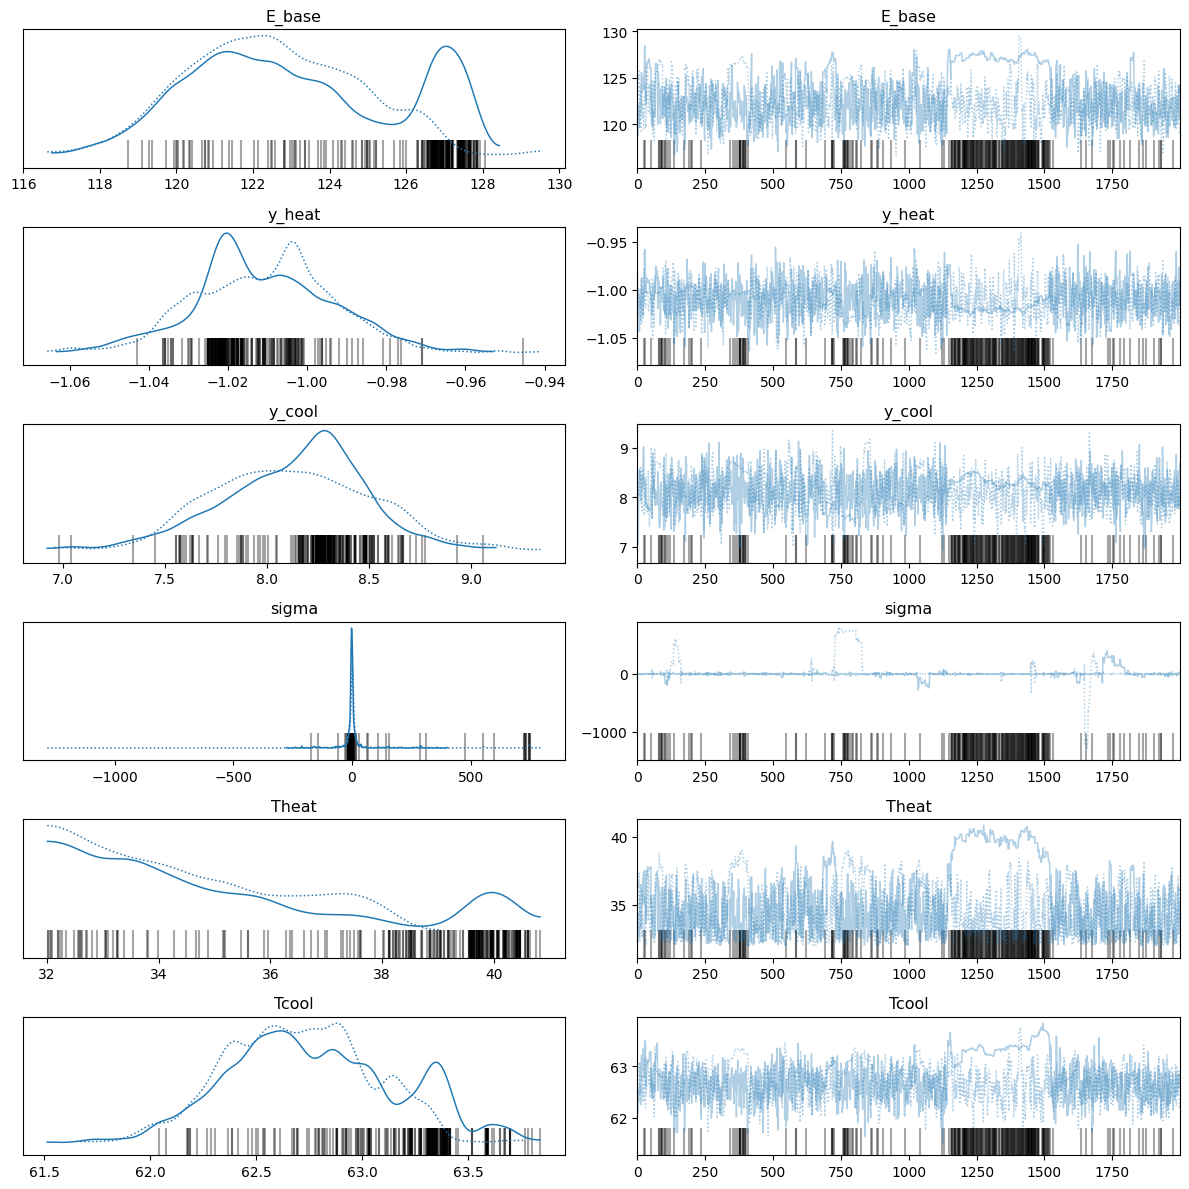

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
pm.plot_trace(trace)
plt.tight_layout()  # Add space between subplots
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df = pd.read_csv("/content/drive/MyDrive/metadata.csv")

# Selecting the desired columns
newdf = df[['dataid', 'building_type', 'house_construction_year', 'total_square_footage']].copy()

# Sorting the DataFrame based on 'dataid'
sorted_df = newdf.sort_values(by='dataid')

# Displaying the sorted DataFrame
sorted_df


,dataid,building_type,house_construction_year,total_square_footage
1657,100,Single-Family Home 001 (Master),NaN,NaN
1666,10000,Single-Family Home 001 (Master),NaN,NaN
1749,10003,Single-Family Home 001 (Master),NaN,NaN
1582,10089,Single-Family Home 001 (Master),1984.0,2425.0
1873,101,Single-Family Home 001 (Master),2012.0,1459.0
...,...,...,...,...
1230,9981,Apartment,NaN,816.0
298,9982,Single-Family Home 001 (Master),2008.0,1422.0
744,9983,Single-Family Home 001 (Master),1967.0,3068.0
1173,9995,Apartment,NaN,NaN


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
data_ids = ['661', '1642', '2335', '2361', '2818', '3039', '3456', '3538', '4031', '4373', '4767', '5746', '6139', '7536', '7719', '7800', '7901', '7951', '8156', '8386', '8565', '9019', '9160', '9922', '9278']

# Extract rows with specified dataids
result_df = sorted_df.loc[sorted_df['dataid'].isin(data_ids)]

# Display the result
print(result_df)

     dataid                    building_type house_construction_year  \
70     1642  Single-Family Home 001 (Master)                  2007.0   
74     2335  Single-Family Home 001 (Master)                  2008.0   
1223   2361  Single-Family Home 001 (Master)                  2009.0   
80     2818  Single-Family Home 001 (Master)                  2007.0   
1898   3039  Single-Family Home 001 (Master)                  2010.0   
84     3456  Single-Family Home 001 (Master)                  2008.0   
315    3538  Single-Family Home 001 (Master)                  2007.0   
92     4031  Single-Family Home 001 (Master)                  2007.0   
1843   4373  Single-Family Home 001 (Master)                  2008.0   
94     4767  Single-Family Home 001 (Master)                  2008.0   
228    5746  Single-Family Home 001 (Master)                  1950.0   
229    6139  Single-Family Home 001 (Master)                  1970.0   
54      661  Single-Family Home 001 (Master)                  20

In [ ]:
x_values = result_df['house_construction_year'].tolist()
y_values = result_df['total_square_footage'].tolist()
building_no = result_df['dataid'].tolist()

print(x_values)
print(y_values)
print(building_no)


['2007.0', '2008.0', '2009.0', '2007.0', '2010.0', '2008.0', '2007.0', '2007.0', '2008.0', '2008.0', '1950.0', '1970.0', '2007.0', '2008.0', '2008.0', '2008.0', '2007.0', '1971.0', '2008.0', '2007.0', '2009.0', '1990.0', '2008.0', '2009.0', '2000.0']
['1720.0', '2710.0', '3245.0', '2345.0', '3246.0', '1720.0', '1720.0', '1946.0', '2122.0', '2710.0', '1768.0', '2361.0', '1842.0', '2710.0', '2919.0', '2075.0', '2122.0', '2148.0', '2669.0', '1720.0', '1998.0', '1613.0', '2310.0', '3015.0', '2331.0']
['1642', '2335', '2361', '2818', '3039', '3456', '3538', '4031', '4373', '4767', '5746', '6139', '661', '7536', '7719', '7800', '7901', '7951', '8156', '8386', '8565', '9019', '9160', '9278', '9922']


In [ ]:
x_values = [float(num) for num in x_values]
y_values = [float(num) for num in y_values]
print(x_values)
print(y_values)
print(type(x_values[0]))

[2007.0, 2008.0, 2009.0, 2007.0, 2010.0, 2008.0, 2007.0, 2007.0, 2008.0, 2008.0, 1950.0, 1970.0, 2007.0, 2008.0, 2008.0, 2008.0, 2007.0, 1971.0, 2008.0, 2007.0, 2009.0, 1990.0, 2008.0, 2009.0, 2000.0]
[1720.0, 2710.0, 3245.0, 2345.0, 3246.0, 1720.0, 1720.0, 1946.0, 2122.0, 2710.0, 1768.0, 2361.0, 1842.0, 2710.0, 2919.0, 2075.0, 2122.0, 2148.0, 2669.0, 1720.0, 1998.0, 1613.0, 2310.0, 3015.0, 2331.0]
<class 'float'>


In [ ]:
# Combine x and y values into coordinate pairs
coordinates = list(zip(x_values, y_values))
coordinates_with_no = list(zip(building_no, x_values, y_values))

# map with building number
map_building = {}
for i, (x, y) in enumerate(coordinates):
  map_building[(x,y)] = i

# Print the first few coordinates as an example
print(coordinates_with_no)

[('1642', 2007.0, 1720.0), ('2335', 2008.0, 2710.0), ('2361', 2009.0, 3245.0), ('2818', 2007.0, 2345.0), ('3039', 2010.0, 3246.0), ('3456', 2008.0, 1720.0), ('3538', 2007.0, 1720.0), ('4031', 2007.0, 1946.0), ('4373', 2008.0, 2122.0), ('4767', 2008.0, 2710.0), ('5746', 1950.0, 1768.0), ('6139', 1970.0, 2361.0), ('661', 2007.0, 1842.0), ('7536', 2008.0, 2710.0), ('7719', 2008.0, 2919.0), ('7800', 2008.0, 2075.0), ('7901', 2007.0, 2122.0), ('7951', 1971.0, 2148.0), ('8156', 2008.0, 2669.0), ('8386', 2007.0, 1720.0), ('8565', 2009.0, 1998.0), ('9019', 1990.0, 1613.0), ('9160', 2008.0, 2310.0), ('9278', 2009.0, 3015.0), ('9922', 2000.0, 2331.0)]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

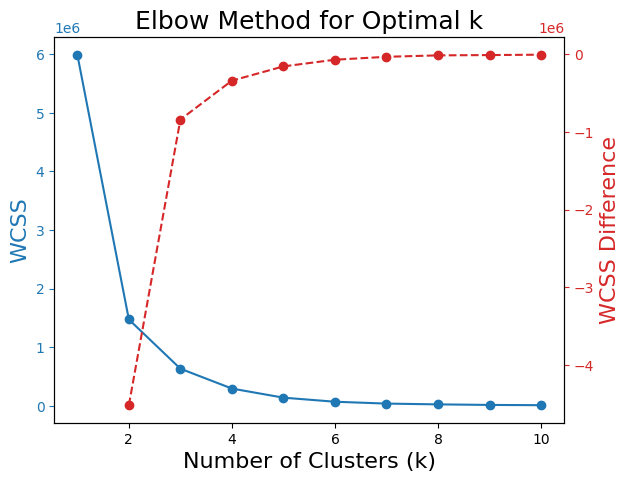

The optimal value for k (elbow point) is: 2


In [ ]:
# Example data
# np.random.seed(42)
data_points = np.array(coordinates)

# Range of values for k
k_values = range(1, 11)

# List to store the within-cluster sum of squares (WCSS) for each k
wcss_values = []

# Calculate WCSS for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_points)
    wcss_values.append(kmeans.inertia_)

# Calculate the differences between consecutive WCSS values
wcss_diff = np.diff(wcss_values)

# Plot the elbow method curve and differences
fig, ax1 = plt.subplots()

ax1.plot(k_values, wcss_values, marker='o', label='WCSS')
ax1.set_xlabel('Number of Clusters (k)', fontsize=16)
ax1.set_ylabel('WCSS', color='tab:blue', fontsize=16)
ax1.tick_params('y', colors='tab:blue')

ax2 = ax1.twinx()
ax2.plot(k_values[1:], wcss_diff, marker='o', linestyle='dashed', color='tab:red', label='WCSS Difference')
ax2.set_ylabel('WCSS Difference', color='tab:red', fontsize=16)
ax2.tick_params('y', colors='tab:red')

fig.tight_layout()
plt.title('Elbow Method for Optimal k', fontsize=18)
plt.show()

# Find the "elbow" point where the rate of decrease slows down
elbow_index = np.argmin(wcss_diff) + 1
optimal_k = k_values[elbow_index]

print(f"The optimal value for k (elbow point) is: {optimal_k}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 :
  Building 8386: (2007.0, 1720.0)
  Building 2818: (2007.0, 2345.0)
  Building 3456: (2008.0, 1720.0)
  Building 8386: (2007.0, 1720.0)
  Building 4031: (2007.0, 1946.0)
  Building 4373: (2008.0, 2122.0)
  Building 5746: (1950.0, 1768.0)
  Building 6139: (1970.0, 2361.0)
  Building 661: (2007.0, 1842.0)
  Building 7800: (2008.0, 2075.0)
  Building 7901: (2007.0, 2122.0)
  Building 7951: (1971.0, 2148.0)
  Building 8386: (2007.0, 1720.0)
  Building 8565: (2009.0, 1998.0)
  Building 9019: (1990.0, 1613.0)
  Building 9160: (2008.0, 2310.0)
  Building 9922: (2000.0, 2331.0)
Cluster 1 :
  Building 7536: (2008.0, 2710.0)
  Building 2361: (2009.0, 3245.0)
  Building 3039: (2010.0, 3246.0)
  Building 7536: (2008.0, 2710.0)
  Building 7536: (2008.0, 2710.0)
  Building 7719: (2008.0, 2919.0)
  Building 8156: (2008.0, 2669.0)
  Building 9278: (2009.0, 3015.0)


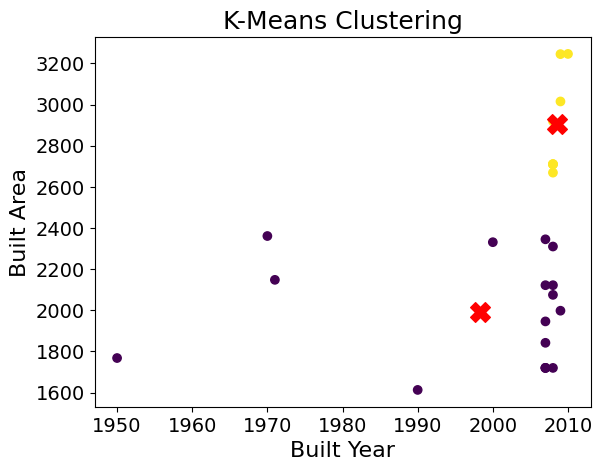

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_points)
cluster_labels = kmeans.fit_predict(data_points)

mapping = {}
for i, (x, y) in enumerate(data_points):
  if cluster_labels[i] in mapping:
    mapping[cluster_labels[i]].append((map_building[(x,y)], x, y))
  else:
    mapping[cluster_labels[i]] = [(map_building[(x,y)], x, y)]
  #(f"Data point ({x:.2f}, {y:.2f}) belongs to Cluster {cluster_labels[i]}")
cluster = []
for i in mapping.keys():
    building = []
    print("Cluster", i, ':')
    for point in mapping[i]:
        building_index, x, y = point
        building_number = building_no[building_index]
        building.append(building_number)
        print(f"  Building {building_number}: ({x}, {y})")
    cluster.append(building)
# Plot the results
plt.scatter(data_points[:, 0], data_points[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.title('K-Means Clustering', fontsize=18)  # Set font size for title
plt.xlabel('Built Year', fontsize=16)  # Set font size for x-axis label
plt.ylabel('Built Area', fontsize=16)  # Set font size for y-axis label
plt.tick_params(axis='both', labelsize=14)  # Set font size for tick labels
plt.show()

In [ ]:
import numpy as np

def second_order_stochastic_dominance(samples_1, samples_2):
    # Sort the samples
    samples_1 = np.abs(samples_1)
    samples_2 = np.abs(samples_2)

    # Calculate the cumulative distribution function (CDF) for both sets of samples
    cdf_1 = np.cumsum(samples_1)
    cdf_2 = np.cumsum(samples_2)

    # Calculate the areas under the CDFs
    area_cdf_1 = np.trapz(cdf_1)
    area_cdf_2 = np.trapz(cdf_2)

    # print(area_cdf_1)
    # print(area_cdf_2)

    # Check if the area under the CDF of the first set is
    # greater than or equal to the area under the CDF of the second set
    if area_cdf_1 > area_cdf_2:
        return 1
    else:
        return 0


# Generate two sets of MCMC samples for comparison

# Check for second-order stochastic dominance




In [ ]:
#swapping cluster_labels 13 & 14 index to match the parameter sample generation

a = cluster_labels[23]
cluster_labels[23] = cluster_labels[24]
cluster_labels[24] = a
b = building_no[23]
building_no[23] = building_no[24]
building_no[24] = b
print(cluster_labels)
print(building_no)

[0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1]
['1642', '2335', '2361', '2818', '3039', '3456', '3538', '4031', '4373', '4767', '5746', '6139', '661', '7536', '7719', '7800', '7901', '7951', '8156', '8386', '8565', '9019', '9160', '9922', '9278']


In [ ]:
# Convert the list to a set to get unique elements
unique_elements_set = set(cluster_labels)

# Find the length of the set, which gives the count of unique elements
length_of_unique_elements = len(unique_elements_set)

print(length_of_unique_elements)

2


In [ ]:
cluster = [[] for _ in range(max(cluster_labels) + 1)]

for i in range(len(cluster_labels)):
    cluster[cluster_labels[i]].append(building_no[i])

print(cluster)


[['1642', '2818', '3456', '3538', '4031', '4373', '5746', '6139', '661', '7800', '7901', '7951', '8386', '8565', '9019', '9160', '9922'], ['2335', '2361', '3039', '4767', '7536', '7719', '8156', '9278']]


In [ ]:
def generate_samples(trace, num_samples):
    samples_E_base = trace.posterior['E_base'][1][:num_samples]
    samples_y_heat = trace.posterior['y_heat'][1][:num_samples]
    samples_y_cool = trace.posterior['y_cool'][1][:num_samples]

    return samples_E_base, samples_y_heat, samples_y_cool



In [ ]:
print(type(Theat_means[0]))

In [ ]:
building = []
for i in range(len(data_ids)):
  parameter = []
  e_base,y_heat,y_cool = generate_samples(all_traces[i],100)

  parameter.append(y_heat)
  parameter.append(y_cool)
  parameter.append(e_base)
  building.append(parameter)


In [ ]:
print(building)

[[<xarray.DataArray 'y_heat' (draw: 100)>
array([-2.74913979, -2.75257181, -2.76420295, -2.73631577, -2.7384845 ,
       -2.75389205, -2.74551973, -2.75187528, -2.7564666 , -2.74994289,
       -2.75380454, -2.74505435, -2.72987601, -2.71431203, -2.7153997 ,
       -2.725512  , -2.74288538, -2.74288301, -2.72492184, -2.73078916,
       -2.73586432, -2.70737694, -2.71972168, -2.69754531, -2.70848181,
       -2.76596721, -2.68745319, -2.710599  , -2.71049496, -2.71049496,
       -2.74108346, -2.74146792, -2.78817842, -2.78882274, -2.78882274,
       -2.79423973, -2.79423973, -2.79440978, -2.79203294, -2.78822958,
       -2.78822958, -2.78460229, -2.78460229, -2.78460229, -2.77660677,
       -2.75605733, -2.71813554, -2.71995076, -2.71071959, -2.72230105,
       -2.71263478, -2.74299921, -2.73620144, -2.74235044, -2.72748243,
       -2.73815561, -2.75230469, -2.75853117, -2.75652015, -2.75761645,
       -2.74098508, -2.73541662, -2.71741882, -2.75397774, -2.70396881,
       -2.74496681, -2

In [ ]:
print(len(Tcool_means))
print(Theat_means)

25
[98.85861157657602, 98.52753636110975, 97.59125680661714, 99.54873581915655, 99.184045684354, 84.23354324447126, 99.17836241207208, 99.1885093911842, 99.04955098751941, 99.2879584115421, 98.21723193147528, 98.7126917373903, 94.51044267311823, 98.74909809251945, 97.00525103658467, 98.55248014443052, 91.12692597175052, 92.10636781564868, 96.99286433087093, 98.14960621358786, 84.60091080770458, 98.18180308869427, 99.3902735197091, 98.43658488797568, 35.02789082869901]


In [ ]:
import random
building_heat_bal_temp = []
building_cool_bal_temp = []

for i in range(len(building_no)):
  # random_cool_temp = random.randint(37, 63)
  # random_heat_temp = random.randint(63,90)
  building[i].append(Theat_means[i])##.append(mp[building[i]])
  building[i].append(Tcool_means[i])





In [ ]:
building_cluster = []
for i in range(length_of_unique_elements):
  building_c = []
  building_cluster.append(building_c)

In [ ]:
j=0
for i in cluster_labels:

  building_cluster[i].append(building[j])
  j+=1


In [ ]:
print(building_cluster)

[[[<xarray.DataArray 'y_heat' (draw: 100)>
array([-2.74913979, -2.75257181, -2.76420295, -2.73631577, -2.7384845 ,
       -2.75389205, -2.74551973, -2.75187528, -2.7564666 , -2.74994289,
       -2.75380454, -2.74505435, -2.72987601, -2.71431203, -2.7153997 ,
       -2.725512  , -2.74288538, -2.74288301, -2.72492184, -2.73078916,
       -2.73586432, -2.70737694, -2.71972168, -2.69754531, -2.70848181,
       -2.76596721, -2.68745319, -2.710599  , -2.71049496, -2.71049496,
       -2.74108346, -2.74146792, -2.78817842, -2.78882274, -2.78882274,
       -2.79423973, -2.79423973, -2.79440978, -2.79203294, -2.78822958,
       -2.78822958, -2.78460229, -2.78460229, -2.78460229, -2.77660677,
       -2.75605733, -2.71813554, -2.71995076, -2.71071959, -2.72230105,
       -2.71263478, -2.74299921, -2.73620144, -2.74235044, -2.72748243,
       -2.73815561, -2.75230469, -2.75853117, -2.75652015, -2.75761645,
       -2.74098508, -2.73541662, -2.71741882, -2.75397774, -2.70396881,
       -2.74496681, -

In [ ]:
print(len(building_cluster[0][0]))

5


In [ ]:
from tqdm import tqdm

building_map = []
for p in range(5):
  building_m = []
  for k in range(len(building_cluster)):
    for i in range(len(building_cluster[k])):

      if p < 3:

        count = 0
        for j in range(len(building_cluster[k])):
          if i != j:
            count += second_order_stochastic_dominance(building_cluster[k][i][p],building_cluster[k][j][p])
        # print(count)
        # print(((75*(len(building_cluster[k])))/100))
        if count > ((75*(len(building_cluster[k])))/100):
            parameter = 1
        else:
            parameter = 0

        # print(parameter)
        building_m.append(parameter)
      elif p==3:
        if building_cluster[k][i][p] > 99:
          building_m.append(1)
        else:
          building_m.append(0)

      else:
        if building_cluster[k][i][p] < 55:
          building_m.append(1)
        else:
          building_m.append(0)


  # # print(building_m)
  building_map.append(building_m)

building_map = np.transpose(building_map)



In [ ]:
print(building_map)

[[0 0 0 0 0]
 [0 0 0 1 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 1 1 0 0]
 [1 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [1 0 1 0 0]
 [0 1 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 1 0 0 0]
 [0 0 1 0 0]]


In [ ]:
j =0
building_res = []
for i in range(length_of_unique_elements):
  res = []
  building_res.append(res)
for i in cluster_labels:
  building_res[i].append(building_map[j])
  j+=1

In [ ]:
print(building_res)

[[array([0, 0, 0, 0, 0]), array([0, 0, 0, 1, 0]), array([0, 0, 0, 1, 0]), array([1, 1, 1, 0, 0]), array([1, 1, 0, 0, 0]), array([0, 0, 1, 0, 0]), array([1, 0, 1, 0, 0]), array([0, 1, 1, 0, 0]), array([0, 0, 0, 0, 0]), array([0, 0, 0, 1, 0]), array([0, 1, 0, 0, 1]), array([0, 0, 0, 0, 0]), array([0, 0, 0, 1, 1]), array([0, 0, 0, 1, 1]), array([0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0]), array([1, 1, 0, 0, 0])], [array([0, 0, 0, 1, 1]), array([1, 0, 0, 0, 0]), array([0, 0, 0, 1, 0]), array([0, 0, 0, 0, 0]), array([0, 0, 0, 0, 1]), array([0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0]), array([0, 0, 1, 0, 0])]]


In [ ]:
import matplotlib.pyplot as plt


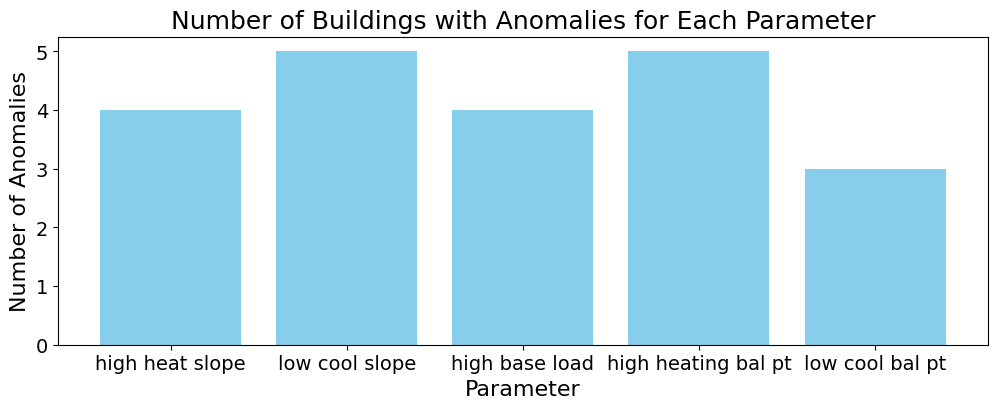

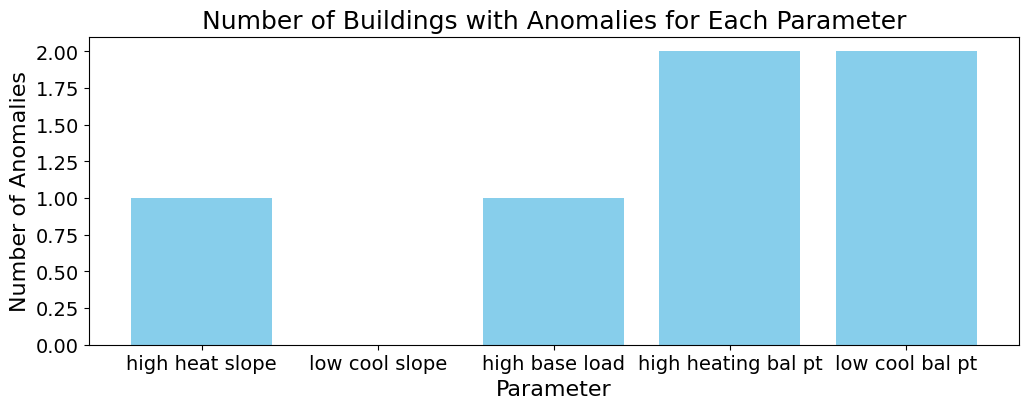

In [ ]:
for i in range(len(building_res)):
  # Determine if the building is efficient or not
  efficiency = np.all(building_res[i] == 0, axis=0)  # Check if all parameters are 0

  # Count the number of anomalies for each parameter
  anomaly_counts = np.sum(building_res[i], axis=0)  # Sum along the columns (axis=0)

  # Plotting
  fig, ax = plt.subplots(figsize=(12, 4))

  # Bar plot for number of anomalies vs parameters
  ax.bar(np.arange(5), anomaly_counts, color='skyblue')
  ax.set_xlabel('Parameter',fontsize=16)
  ax.set_ylabel('Number of Anomalies',fontsize=16)
  ax.set_xticks(np.arange(5))
  ax.set_xticklabels(['high heat slope', 'low cool slope', 'high base load', 'high heating bal pt', 'low cool bal pt'],fontsize=14)
  ax.set_title('Number of Buildings with Anomalies for Each Parameter',fontsize=18)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.show()

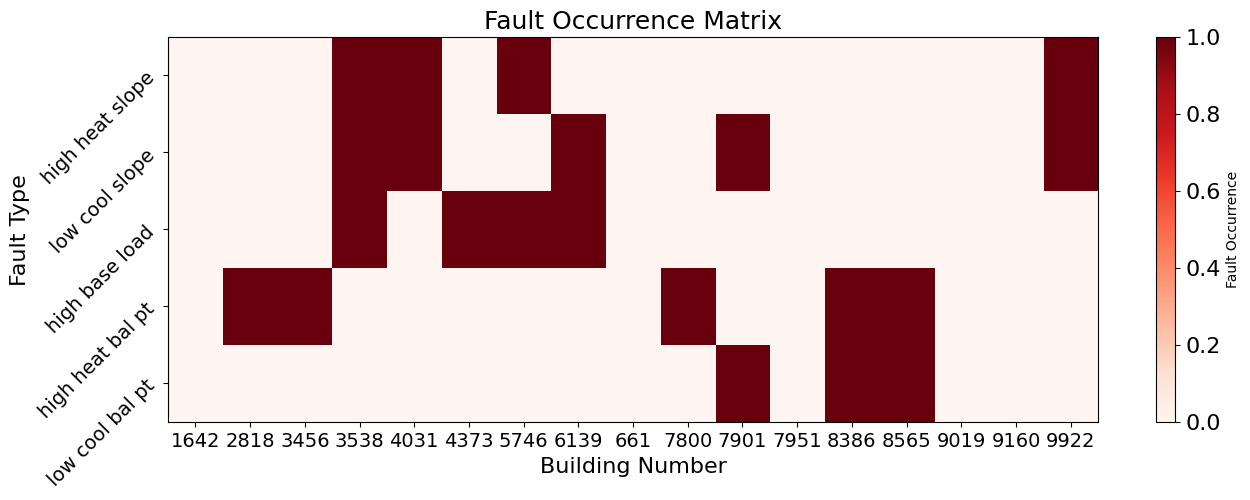

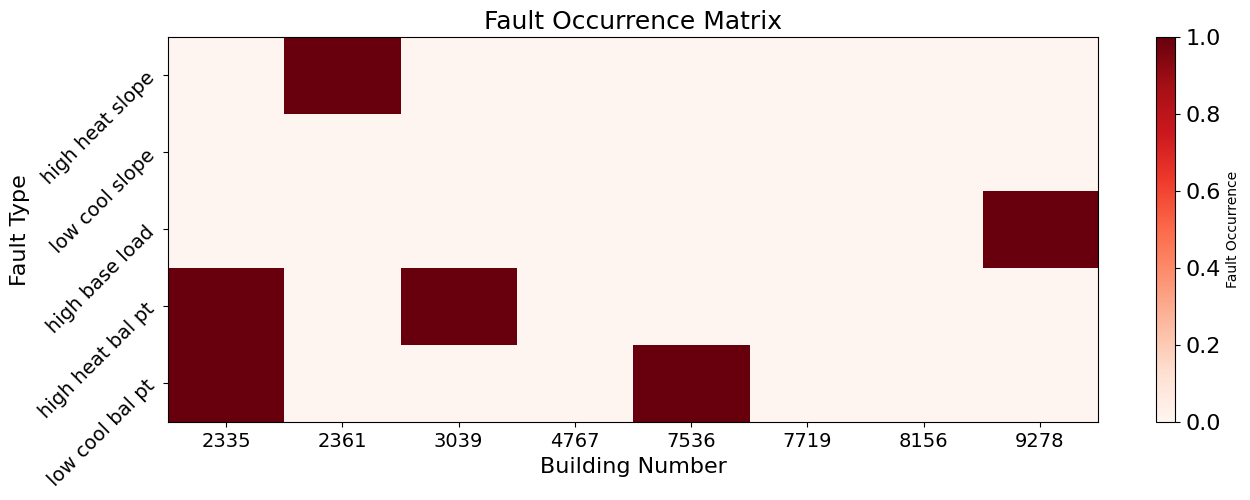

In [ ]:
for i in range(len(building_res)):
    # Increase horizontal space
    fig, ax = plt.subplots(figsize=(15, 5))

    # Create a matrix to store fault occurrences
    fault_matrix = np.zeros_like(building_res[i], dtype=int)

    # Update the matrix based on fault occurrences
    for building_number, faults in enumerate(building_res[i], start=1):
        fault_types = np.where(faults == 1)[0]
        fault_matrix[building_number - 1, fault_types] = 1

    # Plotting the matrix with x-axis and y-axis switched
    im = ax.imshow(fault_matrix.T, cmap='Reds', aspect='auto', interpolation='none')

    ax.set_ylabel('Fault Type', fontsize=16)  # Increase font size for y-axis label
    ax.set_xlabel('Building Number', fontsize=16)  # Increase font size for x-axis label
    ax.set_title('Fault Occurrence Matrix', fontsize=18)  # Increase font size for title
    ax.set_xticks(np.arange(len(cluster[i])), cluster[i])  # Shifted x-axis by subtracting 1
    ax.set_yticks(np.arange(5), ['high heat slope', 'low cool slope', 'high base load', 'high heat bal pt', 'low cool bal pt'], rotation=45, ha='right', fontsize=14)  # Increase font size for y-axis ticks

    # Add colorbar using the mappable (im)
    cbar = plt.colorbar(im, label='Fault Occurrence')
    cbar.ax.tick_params(labelsize=16)  # Increase font size for colorbar ticks
    plt.xticks(fontsize=14)
    plt.show()


In [ ]:
building_fault = []

for i in range(length_of_unique_elements):
  res = []
  building_fault.append(res)

for j in range(len(building_res)):

  for i in range(len(building_res[j])):
    fault = []
    # print(building_res[j][i][0])
    if(building_res[j][i][0]):
      fault.append("Inefficient Heater")
      fault.append("Poor Building Envelope")
    if(building_res[j][i][1]):
      fault.append("Inefficient AC")
      fault.append("Poor Building Envelope")
    if(building_res[j][i][2]):
      fault.append("Inefficient Appliances")
    if(building_res[j][i][3]):
      fault.append("High Set point")
      fault.append("Poor Building Envelope")
    if(building_res[j][i][4]):
      fault.append("Low Set point")
      fault.append("Poor Building Envelope")

    building_fault[j].append(fault)

for i in range(len(building_fault)):
  for j in range(len(building_fault[i])):
    print('building ' +  str(cluster[i][j])+ ' ' + str(building_fault[i][j]))


building 1642 []
building 2818 ['High Set point', 'Poor Building Envelope']
building 3456 ['High Set point', 'Poor Building Envelope']
building 3538 ['Inefficient Heater', 'Poor Building Envelope', 'Inefficient AC', 'Poor Building Envelope', 'Inefficient Appliances']
building 4031 ['Inefficient Heater', 'Poor Building Envelope', 'Inefficient AC', 'Poor Building Envelope']
building 4373 ['Inefficient Appliances']
building 5746 ['Inefficient Heater', 'Poor Building Envelope', 'Inefficient Appliances']
building 6139 ['Inefficient AC', 'Poor Building Envelope', 'Inefficient Appliances']
building 661 []
building 7800 ['High Set point', 'Poor Building Envelope']
building 7901 ['Inefficient AC', 'Poor Building Envelope', 'Low Set point', 'Poor Building Envelope']
building 7951 []
building 8386 ['High Set point', 'Poor Building Envelope', 'Low Set point', 'Poor Building Envelope']
building 8565 ['High Set point', 'Poor Building Envelope', 'Low Set point', 'Poor Building Envelope']
building 901

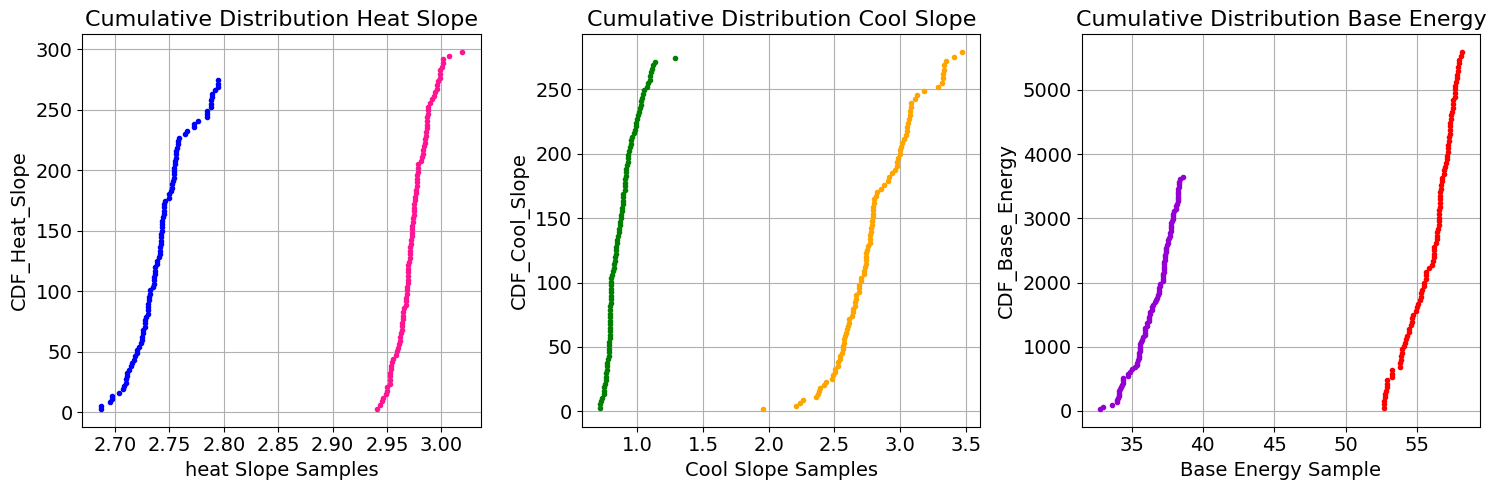

In [ ]:
building_cluster[0][0][0] = np.abs(building_cluster[0][0][0])
sorted_building1 = np.sort(building_cluster[0][0][0])
cdf1 = np.cumsum(sorted_building1)
building_cluster[0][0][1] = np.abs(building_cluster[0][0][1])
sorted_building2 = np.sort(building_cluster[0][0][1])
cdf2 = np.cumsum(sorted_building1)

building_cluster[0][0][2] = np.abs(building_cluster[0][0][2])
sorted_building3 = np.sort(building_cluster[0][0][2])
cdf3 = np.cumsum(sorted_building3)


building_cluster[0][1][0] = np.abs(building_cluster[0][1][0])
sorted_building11 = np.sort(building_cluster[0][1][0])
cdf11 = np.cumsum(sorted_building11)

building_cluster[0][1][1] = np.abs(building_cluster[0][1][1])
sorted_building12 = np.sort(building_cluster[0][1][1])
cdf12 = np.cumsum(sorted_building12)

building_cluster[0][1][2] = np.abs(building_cluster[0][1][2])
sorted_building13 = np.sort(building_cluster[0][1][2])
cdf13 = np.cumsum(sorted_building13)

# Plot the CDF
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(sorted_building1 ,cdf1, marker='.', linestyle='none',color='blue')
plt.plot(sorted_building11, cdf11, marker='.', linestyle='none', color='deeppink', label='Building[1][0]')
plt.xlabel('heat Slope Samples',fontsize=14)
plt.ylabel('CDF_Heat_Slope',fontsize=14)
plt.title('Cumulative Distribution Heat Slope',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

# Plot the samples
plt.subplot(1, 3, 2)
# Create a line plot of the samples
plt.plot(sorted_building2,  cdf2, marker='.', linestyle='none',color='green')
plt.plot(sorted_building12, cdf12, marker='.', linestyle='none', color='orange', label='Building[1][1]')
plt.xlabel('Cool Slope Samples',fontsize=14)
plt.ylabel('CDF_Cool_Slope',fontsize=14)
plt.title('Cumulative Distribution Cool Slope',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
# Plot the samples
plt.subplot(1, 3, 3)
# Create a line plot of the samples
plt.plot(sorted_building3,  cdf3, marker='.', linestyle='none',color='red')
plt.plot(sorted_building13, cdf13, marker='.', linestyle='none', color='darkviolet', label='Building[1][2]')
plt.xlabel('Base Energy Sample',fontsize=14)
plt.ylabel('CDF_Base_Energy',fontsize=14)
plt.title('Cumulative Distribution Base Energy',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()


plt.tight_layout()
plt.show()

In [ ]:
print(second_order_stochastic_dominance(building_cluster[0][0][0],building_cluster[0][1][0]))

0


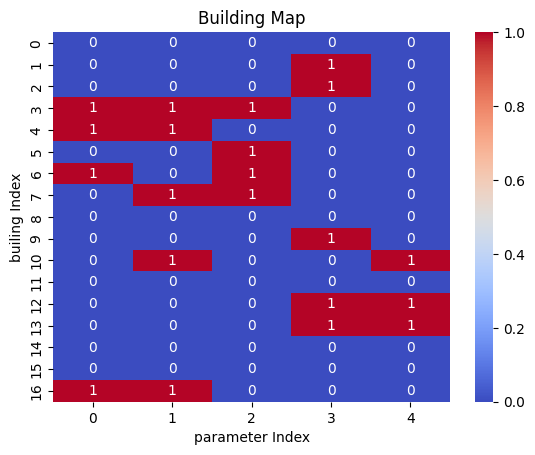

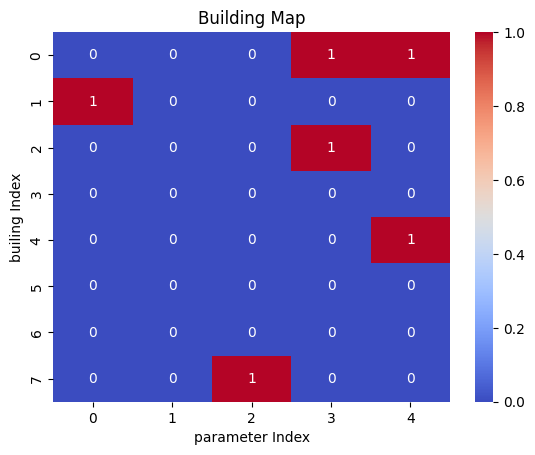

In [ ]:
import seaborn as sns
for i in range(len(building_res)):
  # Assuming building_map is a NumPy array
  sns.heatmap(building_res[i], cmap='coolwarm', annot=True, fmt='d')
  plt.title('Building Map')
  plt.xlabel('parameter Index')
  plt.ylabel('builing Index')
  plt.show()